# Let's Grow More(LGMVIP) - "DATA SCIENCE INTERN"

### LGMVIP March-23

### AUTHOR - Mutyala Harini

### BEGINNER LEVEL TASK

### TASK-2 - Stock Market Prediction And Forecasting Using Stacked LSTM

 In this task we will do stock market prediction using Stack LSTM
 
#### DatasetLink : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

#### Importing Libraries

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
Dataset_link='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [24]:
df= pd.read_csv(Dataset_link, parse_dates=True,)
df.reset_index()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [25]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [26]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


### Checking the null values in data

In [28]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Luckily we don't have any missing values in our data so we are good to go and prepare the data

### Describing the Dataset

In [29]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### Sorting data according to date

In [30]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, yearfirst=False) #Converting to date-time format in pandas for sorting in ascending order
dataAsc = df.sort_values(by='Date')
dataAsc

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [31]:
#Reset the index of our data
dataAsc.reset_index(inplace=True)
dataAsc.drop('index', axis='columns', inplace=True)
dataAsc

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


### Plotting Closing Data

To visualize the analysis of stock market we will plot the closing data

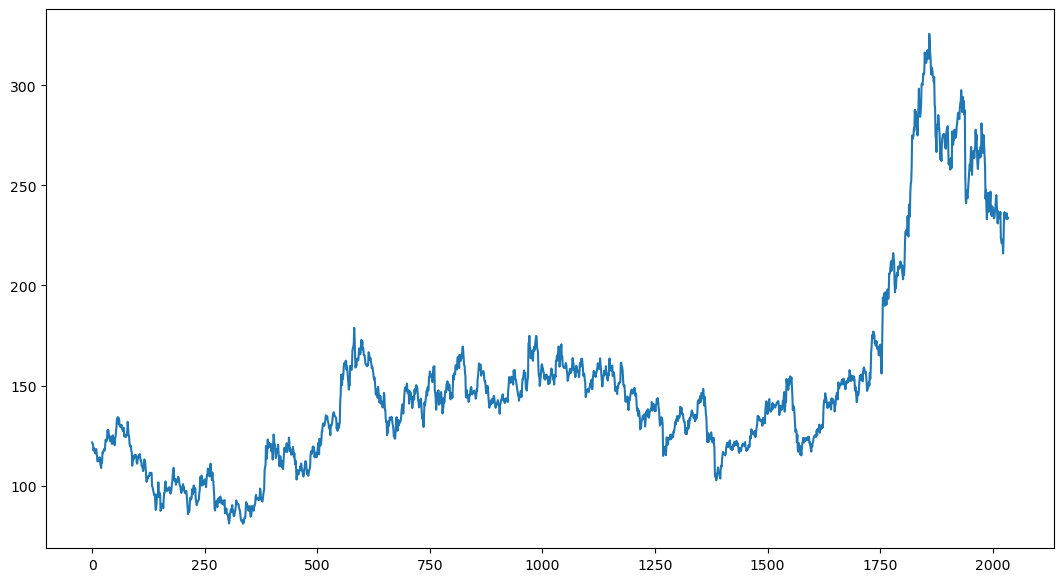

In [32]:
plt.figure(figsize=(13,7))
plt.plot(dataAsc['Close'])

### Scaling the data

For giving the data to LSTM, first we need to scale the data between specific range which we generally keep from 0 to 1. We will do this with the help of minmax scaler from sklearn module

In [33]:
#First we will seperate the close column from our dataset and then scale it after converting it to numpy array
dataClose = dataAsc['Close']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataClose = scaler.fit_transform(np.array(dataClose).reshape(-1,1))
dataClose

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Splitting data into train and test data

In [34]:
train_size = int(len(dataClose)*0.7)
train_data = dataClose[:train_size]
test_data = dataClose[train_size:]
print(len(train_data))
print(len(test_data))

1424
611


### Data preprocessing

In this we will create a function that will create our data to be ready to give to LSTM. In this we will take first 99 close values and give it as input and 100th value as output value for training and similarly we will do for 99 values from second value and give 101th value as output and so on we will keep increasing our starting value by 1. In simple words we suppose we want to find the price for 100th day then we will give 99 values before 100th value to the input and if we want the 105th day price then we will give 99 values before the 105th value to train and predict the output of 105th value.

In this model we will use set of 150 days.

In [35]:
def data_preprocess(data,ts):
    xdata, ydata = [], []
    for i in range(len(data)-ts-1):
        xdata.append(data[i:i+ts])
        ydata.append(data[i+ts])
    return np.array(xdata), np.array(ydata)

In [36]:
#We will 150 timesteps for training our model
xTrain, yTrain = data_preprocess(train_data, 150)
xTest, yTest = data_preprocess(test_data, 150)
print(xTrain.shape, yTrain.shape)

(1273, 150, 1) (1273, 1)


In [37]:
xTrain

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.08455882],
        [0.05535131],
        [0.0620915 ]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.05535131],
        [0.0620915 ],
        [0.06311275]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.0620915 ],
        [0.06311275],
        [0.05861928]],

       ...,

       [[0.14848856],
        [0.14460784],
        [0.15196078],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.14460784],
        [0.15196078],
        [0.15788399],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.15196078],
        [0.15788399],
        [0.13991013],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

In [38]:
yTrain

array([[0.06311275],
       [0.05861928],
       [0.02634804],
       ...,
       [0.15420752],
       [0.15012255],
       [0.15747549]])

### Creating LSTM Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [40]:
model = Sequential()
model.add(LSTM(70, return_sequences=True, input_shape=(150,1)))
model.add(LSTM(60, return_sequences=True))
model.add(Dropout(0.05)) #This will discard 5% of the neurons to prevent overfitting
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 70)           20160     
                                                                 
 lstm_4 (LSTM)               (None, 150, 60)           31440     
                                                                 
 dropout_1 (Dropout)         (None, 150, 60)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                22200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 73,851
Trainable params: 73,851
Non-trainable params: 0
_________________________________________________________________


### Training Our Data

In [41]:
model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 213ms/step - loss: 0.0100 - val_loss: 0.0122
Epoch 2/100
20/20 [==============================] - 3s 169ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 3/100
20/20 [==============================] - 3s 173ms/step - loss: 9.1728e-04 - val_loss: 0.0036
Epoch 4/100
20/20 [==============================] - 4s 178ms/step - loss: 8.1962e-04 - val_loss: 0.0051
Epoch 5/100
20/20 [==============================] - 4s 180ms/step - loss: 8.0367e-04 - val_loss: 0.0043
Epoch 6/100
20/20 [==============================] - 4s 184ms/step - loss: 7.7849e-04 - val_loss: 0.0042
Epoch 7/100
20/20 [==============================] - 4s 205ms/step - loss: 7.6119e-04 - val_loss: 0.0044
Epoch 8/100
20/20 [==============================] - 4s 207ms/step - loss: 7.4338e-04 - val_loss: 0.0053
Epoch 9/100
20/20 [==============================] - 4s 207ms/step - loss: 7.2946e-04 - val_loss: 0.0040
Epoch 10/100
20/20 [==============================] - 4s 206ms/

20/20 [==============================] - 4s 213ms/step - loss: 2.0368e-04 - val_loss: 0.0014
Epoch 79/100
20/20 [==============================] - 4s 209ms/step - loss: 1.9440e-04 - val_loss: 0.0017
Epoch 80/100
20/20 [==============================] - 4s 210ms/step - loss: 1.9298e-04 - val_loss: 0.0011
Epoch 81/100
20/20 [==============================] - 4s 212ms/step - loss: 1.7310e-04 - val_loss: 0.0020
Epoch 82/100
20/20 [==============================] - 4s 210ms/step - loss: 1.8608e-04 - val_loss: 0.0021
Epoch 83/100
20/20 [==============================] - 4s 212ms/step - loss: 1.9501e-04 - val_loss: 0.0020
Epoch 84/100
20/20 [==============================] - 4s 212ms/step - loss: 1.8252e-04 - val_loss: 0.0014
Epoch 85/100
20/20 [==============================] - 4s 223ms/step - loss: 1.8750e-04 - val_loss: 0.0025
Epoch 86/100
20/20 [==============================] - 4s 213ms/step - loss: 1.7318e-04 - val_loss: 9.1081e-04
Epoch 87/100
20/20 [==============================] - 4

### Predicting on Train and Test data

In [42]:
trainPred = model.predict(xTrain)
testPred = model.predict(xTest)

15/15 [==============================] - 1s 37ms/step


The above prediction is in the scaled form which we need to convert into original form.

In [43]:
trainPred = scaler.inverse_transform(trainPred)
testPred = scaler.inverse_transform(testPred)

We will now calculate root mean squared error on our predicted data and actual data

In [44]:
from sklearn.metrics import mean_squared_error
import math
rmseTrain = math.sqrt(mean_squared_error(yTrain,trainPred))
rmseTest = math.sqrt(mean_squared_error(yTest,testPred))
print("Train Rmse: ",rmseTrain," Test Rmse: ",rmseTest)

Train Rmse:  133.81485910255392  Test Rmse:  211.7816163809461


### Plotting the predictions

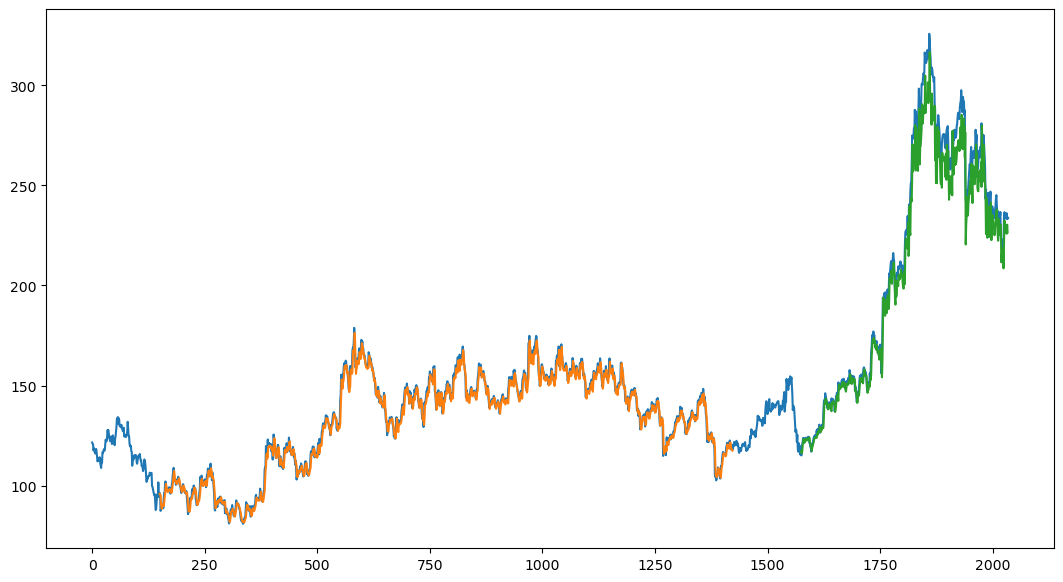

In [45]:
#Shifting predicted train data for plotting
trainPredPlt = np.empty_like(dataClose)
trainPredPlt[:,:] = np.nan
trainPredPlt[150:len(trainPred)+150,:] = trainPred

#Shifting predicted test data for plotting
testPredPlt = np.empty_like(dataClose)
testPredPlt[:,:] = np.nan
testPredPlt[300+len(trainPred)+1:len(dataClose)-1,:] = testPred

plt.figure(figsize=(13,7))
plt.plot(dataAsc['Close'])
plt.plot(trainPredPlt)
plt.plot(testPredPlt)

### Let us predict the closing price for the next day

In [46]:
dataClose.shape

(2035, 1)

In [47]:
futTrain = np.array(dataClose[1885:,:])
futTrain.shape

(150, 1)

In [48]:
futTrain = futTrain.reshape(1,futTrain.shape[0],1)
futTrain.shape

(1, 150, 1)

In [49]:
futPred = model.predict(futTrain)

1/1 [==============================] - 0s 35ms/step


In [50]:
futPred = scaler.inverse_transform(futPred)
futPred

array([[226.95688]], dtype=float32)

Here We can see the closing price for next day is 227.451. In this way we can predict the data for future using Stacked LSTM Model.

### Thank You!

### -By Mutyala Harini